## 1. Introduction

In the modern era of dissinformation campaigns, fast moving news cycles and a sheer uncheckable amount of media, one would assume the press and television play pivotal roles in differentiating fact from fiction. As a matter of fact, its role in society has always been to shape public opinion, influence decision-making and foster discourse <cite id="g0uds"><a href="#zotero%7C17031804%2FW98IDGWM">(Happer &#38; Philo, 2013)</a></cite>.

In recent years, however we have witnessed significant transformations in the way information is produced, consumed, and perceived over the past decades <cite id="2a2te"><a href="#zotero%7C17031804%2FMAEMS8PD">(Casero-Ripollés, 2012)</a></cite>. Especially the trust in news outlets, be it print media or television, has seemingly declined, with people suspecting biases left and right <cite id="g3ven"><a href="#zotero%7C17031804%2FF68AXVWU">(Strömbäck et al., 2020)</a></cite>. Understanding the dynamics of public confidence in these mediums is crucial for assessing their societal impact and effectiveness as conduits of information.

In no other country is this as apparent as in the US. From fostering the breeding ground of Q-Anon and the resulting January 6th insurections <cite id="34s4g"><a href="#zotero%7C17031804%2FC22RZNRD">(Daly, 2021)</a></cite> to speculations about "Jewish Space Lasers" <cite id="w1nli"><a href="#zotero%7C17031804%2FDWQWRWV8">(Beauchamp, 2021)</a></cite>, the US populus has stood out in recent years with its seeming information resistence.

This paper aims at evaluating people's confidence in the press and television in the United States, spanning the period from 1998 to 2022 according to the General Social Survey (GSS), comparing several key indicators such as gender, education level and party affiliation. 

## 2 Methodology

### 2.1 Data source
The primary dataset used in this study is the General Social Survey (GSS), a nationally representative survey conducted in the United States <cite id="e0tdf"><a href="#zotero%7C17031804%2FZQPTQBNI">(<i>GSS General Social Survey | NORC</i>, n.d.)</a></cite>. The GSS collects data on a wide range of social, demographic, and attitudinal variables, making it well-suited for examining trends in public opinion over time. I used the GSS data archives spanning the years 1998 to 2022 because this timeframe encapsulates many significant societal and technological changes. Specifically, 1998 is when Google first launched their search engine, making the web majority accessible, thus kickstarting a new era of information exchange <cite id="t27y6"><a href="#zotero%7C17031804%2F4M6R538D">(Larson et al., 2007)</a></cite>.

### 2.2 Data pre-processing
To pre-process the data, I used the Python programming language to download, unzip and prepare the Stata `dta` files. Utilizing the PyStata library, these individual datasets were then merged into a single large dataset encompassing the entire study period.

### 2.3 Variables of interest
The primary variables of interest in this study include measures of confidence in the press (`conpress`) and television (`contv`), as captured by survey questions within the GSS. Additionaly some demographic characteristics like gender (`sex`) and education level (`degree`) as well as political affiliation (`partyid`) are also being taken into account.

## 3. Preparing the data

The pre-processing of the data is done in two steps. First, we need to download and extract the data. This can be done with plain Python. Next, we need to combine the individual Stata datasets into one single dataset. To achieve this, we will be using the pandas library as well as the PyStata library.

### 3.1 Getting the data

To get started with retrieving the data, we need to import some necessary libraries and modules such as `os`, `zipfile` and `urllib`. If it doesn't exist, we also create a directory to store the survey data and a directory to store our graphs later on.

In [1]:
import os
import zipfile
from urllib.request import urlretrieve

def mkdir_if_not_exists(path):
    if not os.path.exists(path):
        os.mkdir(path)

data_path = "gss_data"
graphs_path = "graphs"

mkdir_if_not_exists(data_path)
mkdir_if_not_exists(graphs_path)

Next, we define the URLs and use the urlretrieve function to download data files from the specified sources, ensuring they are accessible for subsequent analysis. The downloaded data files are then stored in the previously created directory.

In [2]:
dataset_urls = [
    ("https://gss.norc.org/documents/stata/1998_stata.zip", 1998),
    ("https://gss.norc.org/documents/stata/2000_stata.zip", 2000),
    ("https://gss.norc.org/documents/stata/2002_stata.zip", 2002),
    ("https://gss.norc.org/documents/stata/2004_stata.zip", 2004),
    ("https://gss.norc.org/documents/stata/2006_stata.zip", 2006),
    ("https://gss.norc.org/documents/stata/2008_stata.zip", 2008),
    ("https://gss.norc.org/documents/stata/2010_stata.zip", 2010),
    ("https://gss.norc.org/documents/stata/2012_stata.zip", 2012),
    ("https://gss.norc.org/documents/stata/2014_stata.zip", 2014),
    ("https://gss.norc.org/documents/stata/2016_stata.zip", 2016),
    ("https://gss.norc.org/documents/stata/2018_stata.zip", 2018),
    ("https://gss.norc.org/documents/stata/2021_stata.zip", 2021),
    ("https://gss.norc.org/documents/stata/2022_stata.zip", 2022)
]

dataset_zips = []
for (url, year) in dataset_urls:
    f, _ = urlretrieve(url, os.path.join(data_path, str(year) + ".zip"))
    dataset_zips.append((f, year))

Finally, we can unzip the `dta` files and remove the downloaded `zip` archives.

In [3]:
dataset_files = []
for (zip, year) in dataset_zips:
    with zipfile.ZipFile(zip) as z:
        file_to_extract = list(filter(lambda x: x.filename.endswith(".dta"), z.infolist()))[0]
        file_to_extract.filename = str(year) + ".dta"
        z.extract(file_to_extract, data_path)
        dataset_files.append(os.path.join(data_path, file_to_extract.filename))

    os.remove(zip)

### 3.2 Combining the datasets

Before we get started with combining the datasets, we need to initialize PyStata.

In [4]:
from pystata import config

config.init("be", splash=False)

Now, we can import pystata and pandas and get started with merging the datasets. To do this, we first need to get all the data from Stata into pandas dataframes. Additionally, we will only be extracting the relevant columns. 

In [5]:
from pystata import stata
import pandas as pd

relevant_columns = ["year", "id", "sex", "degree", "partyid", "conpress", "contv"]

dataset_dataframes = []
for file in dataset_files:
    stata.run("clear all")
    stata.run(f"use {file}")
    dataset_dataframes.append(stata.pdataframe_from_data()[relevant_columns])

dataset = pd.concat(dataset_dataframes)

Finally, we can export the dataframe as a Stata data file.

In [6]:
stata.run("clear all")
stata.pdataframe_to_data(dataset)

Before we can begin work on the dataset, we are going to label the data.

In [7]:
%%stata -qui

label variable id "respondent id number"
label variable year "gss year for this respondent"

label define sex_label 1 "male" 2 "female" 
label values sex sex_label
label variable sex "respondents sex"

label define degree_label 0 "less than high school" ///
1 "high school" ///
2 "associate/junior college" ///
3 "bachelor's" ///
4 "graduate"
label values degree degree_label
label variable degree "respondents highest degree"

label define partyid_label 0 "strong democrat" ///
1 "not very strong democrat" ///
2 "independent, close to democrat" ///
3 "independent (neither, no response)" ///
4 "independent, close to republican" ///
5 "not very strong republican" ///
6 "strong republican" ///
7 "other party"
label values partyid partyid_label
label variable partyid "respondents political party affiliation"

label define confidence_label 1 "a great deal" ///
2 "only some" ///
3 "hardly any" 

label values conpress confidence_label
label variable conpress "respondents confidence in press"

label values contv confidence_label
label variable contv "respondents confidence in television"

save gss_data_1998_2022.dta, replace
clear all

With the heavy lifting now done, we can start analyzing the data.

## 4. Analyzing the data

We can now load the `dta` file.

In [8]:
%%stata -qui
clear all
use gss_data_1998_2022.dta

### 4.1 Trust in press and TV by year

We are first going to take a look at the overall averages of media confidence over the years to assess wheather there even has been a change in attitude over the last two decades. And if so, how significant it actually is.

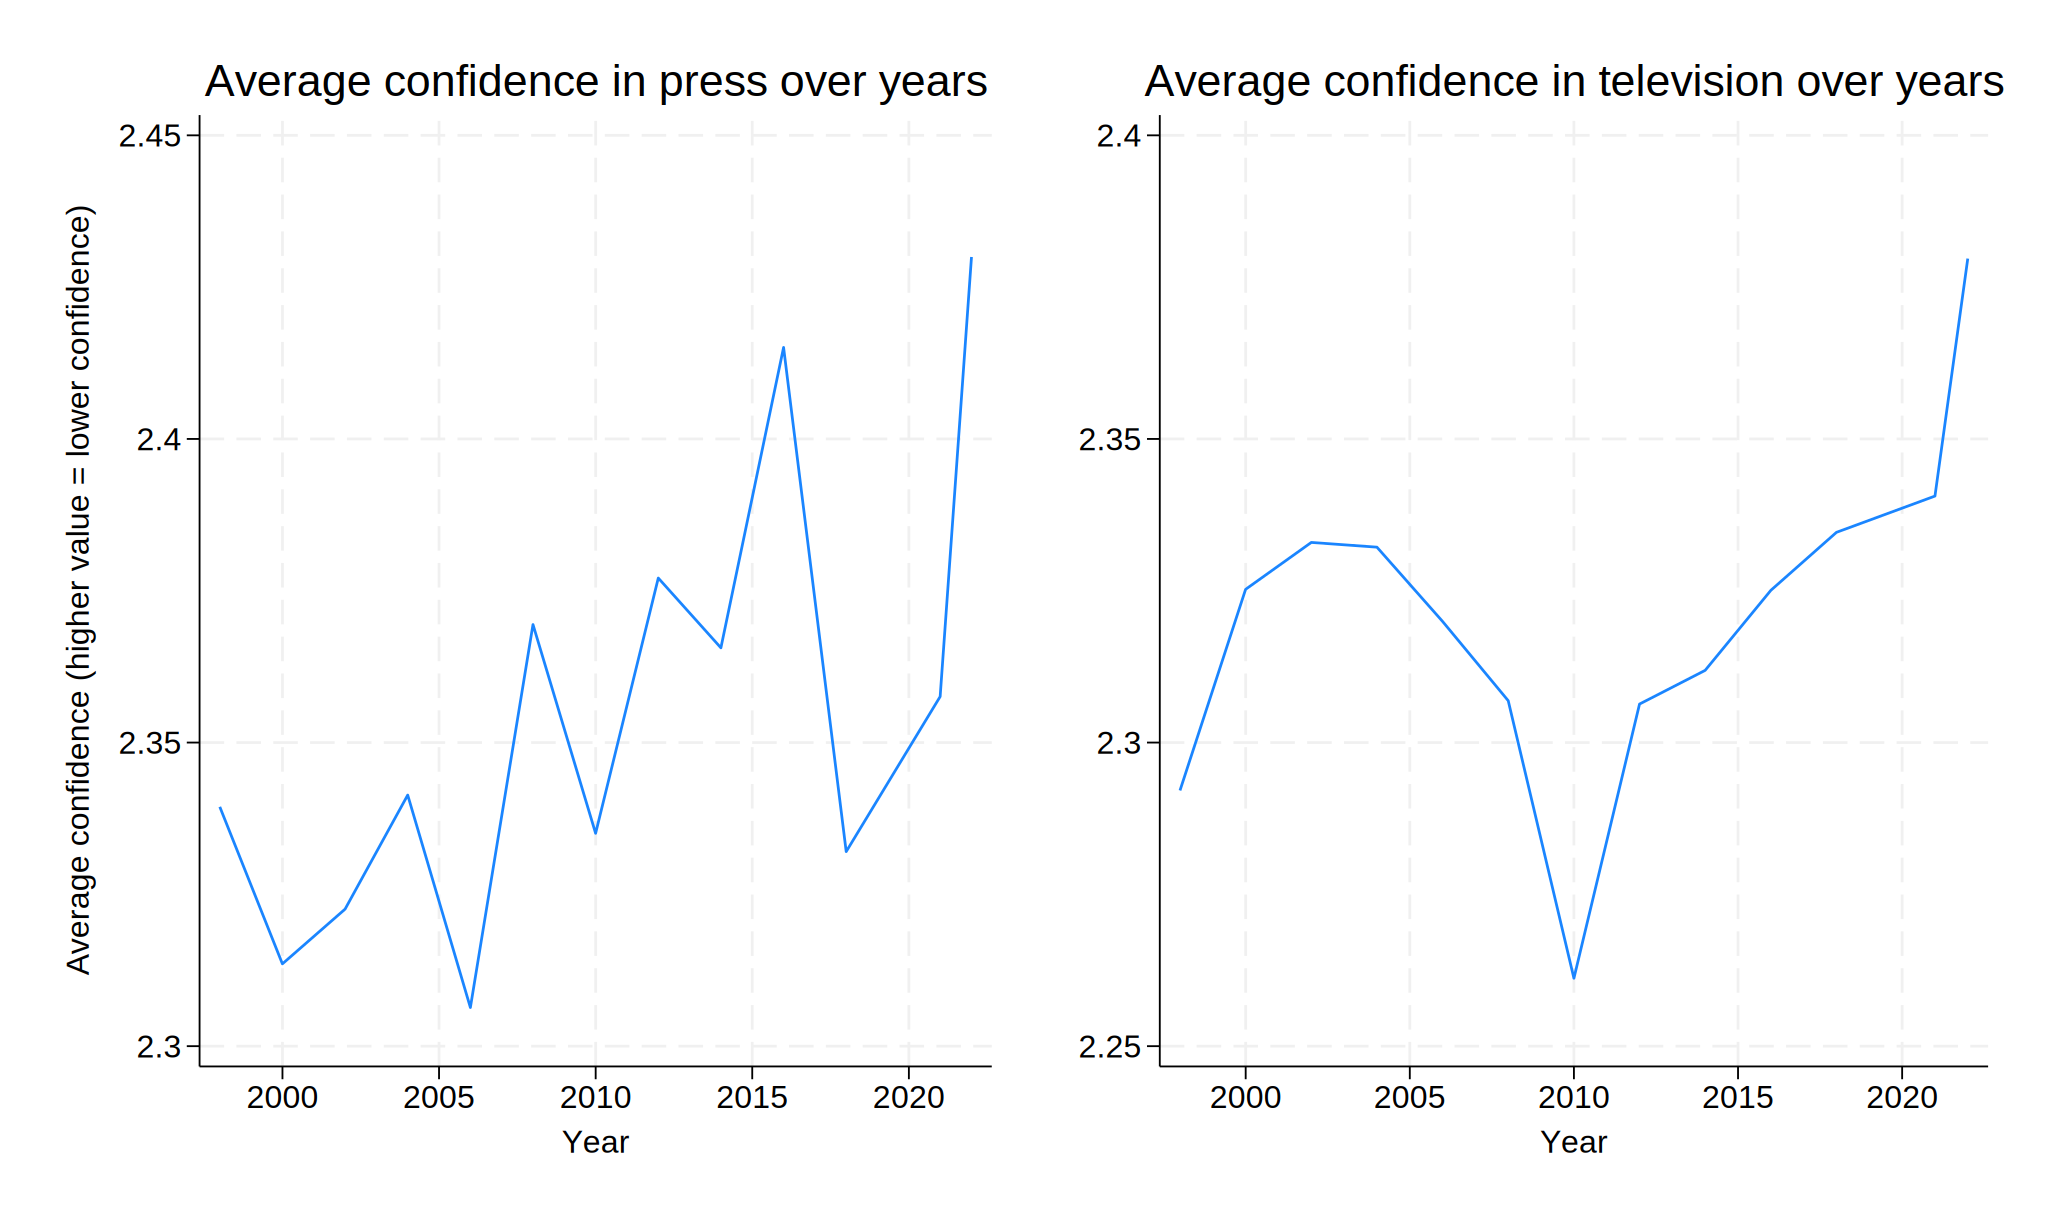

In [9]:
%%stata -qui
egen avg_confidence_press = mean(conpress), by(year)
graph twoway (line avg_confidence_press year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in press over years") ///
), saving("graphs/press_total", replace)


egen avg_confidence_tv = mean(contv), by(year)
graph twoway (line avg_confidence_tv year, ///
        ytitle("") ///
        xtitle("Year") ///
        title("Average confidence in television over years") ///
), saving("graphs/tv_total", replace)

graph combine "graphs/press_total.gph" "graphs/tv_total.gph"

From the above graphs we know that there is a slight increase in distrust in media, meaning there is also some charecteristic driving this change. In the following chapters we are going to isolate some variables (like gender, education, etc.) to find out if any of them correlate with the change in media distrust.

### 4.2 Trust in press and TV by year by gender

One possibility for the increase in media distrust could be gender divide. As an article from the Financial Times has recently shown, the political divergence between males and females is at an all-time high <cite id="uvnqa"><a href="#zotero%7C17031804%2FTP5UJ49C">(Burn-Murdoch, 2024)</a></cite>. This could also present in a diverging distrust in media. Therefore, we are going to analyze if men and women show signs of differing trust in media outlets.

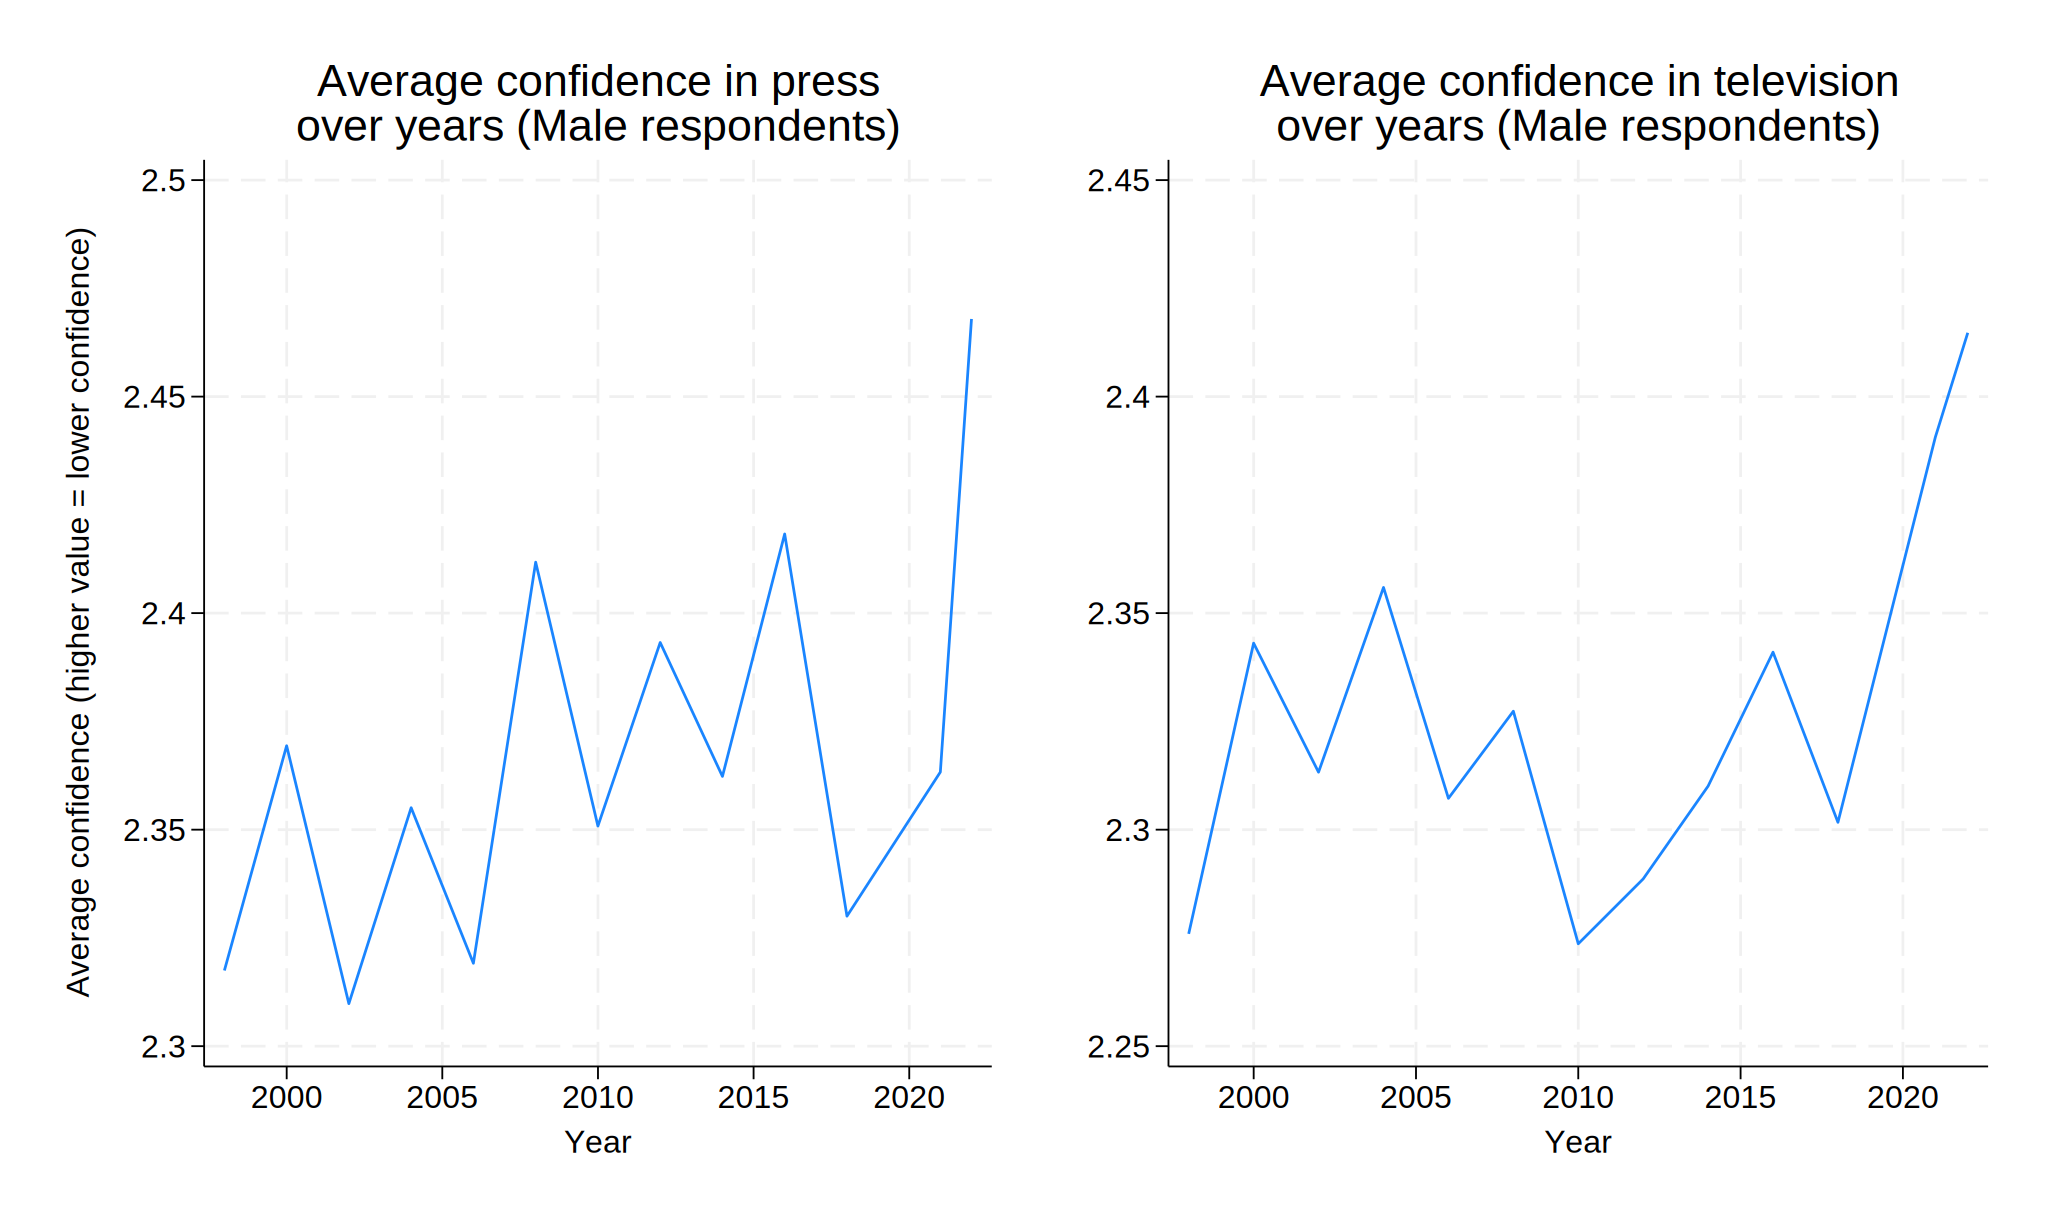

In [10]:
%%stata -qui
egen avg_confidence_press_male = mean(conpress) if sex == 1, by(year)
graph twoway (line avg_confidence_press_male year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in press" "over years (Male respondents)") ///
), saving("graphs/press_male", replace)

egen avg_confidence_tv_male = mean(contv) if sex == 1, by(year)
graph twoway (line avg_confidence_tv_male year, ///
        ytitle("") ///
        xtitle("Year") ///
        title("Average confidence in television" "over years (Male respondents)") ///
), saving("graphs/tv_male", replace)

graph combine "graphs/press_male.gph" "graphs/tv_male.gph"

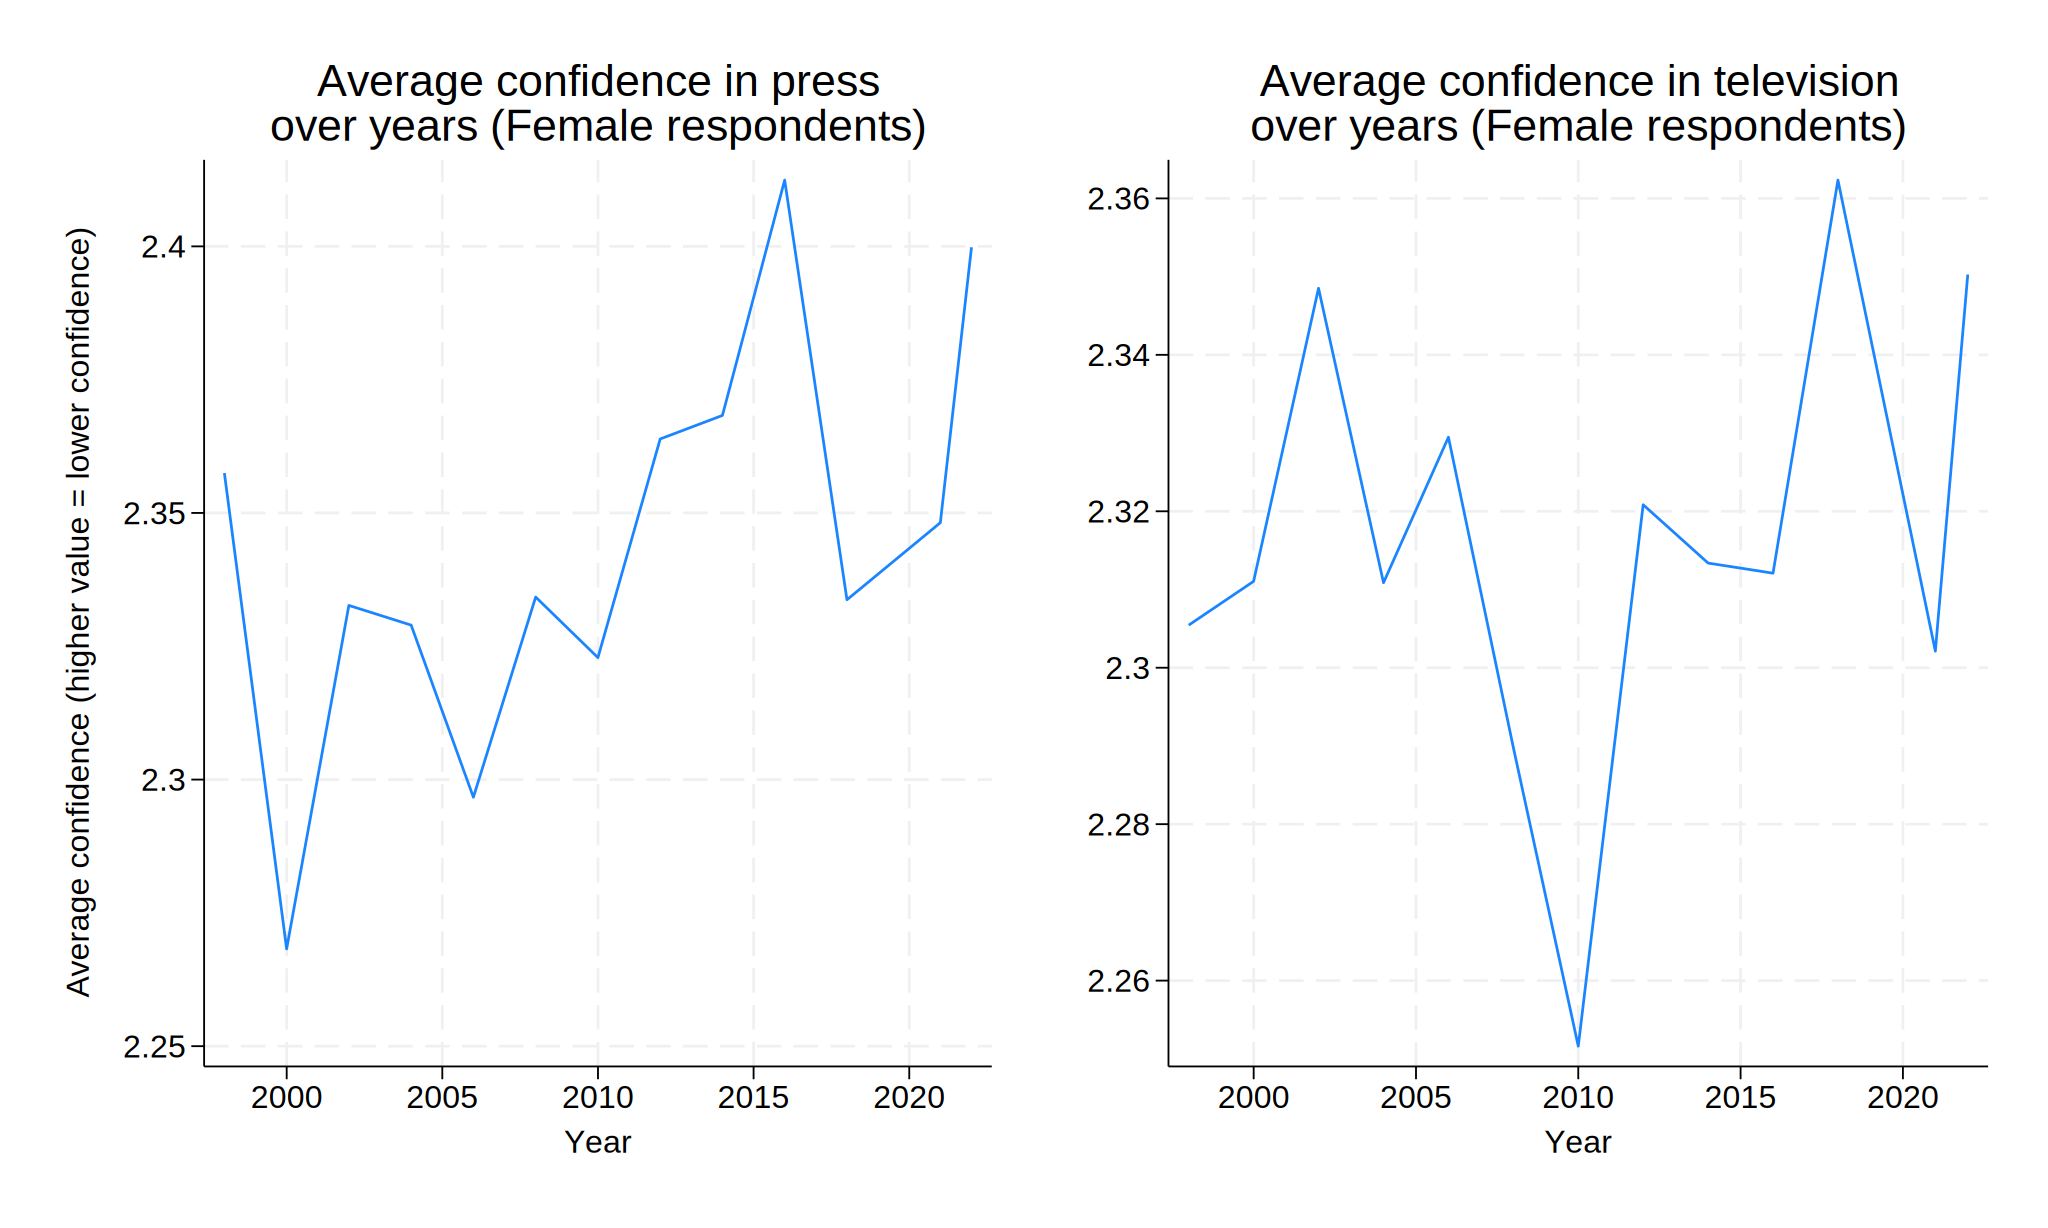

In [11]:
%%stata -qui
egen avg_confidence_press_female = mean(conpress) if sex == 2, by(year)
graph twoway (line avg_confidence_press_female year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in press" "over years (Female respondents)") ///
), saving("graphs/press_female", replace)

egen avg_confidence_tv_female = mean(contv) if sex == 2, by(year)
graph twoway (line avg_confidence_tv_female year, ///
        ytitle("") ///
        xtitle("Year") ///
        title("Average confidence in television" "over years (Female respondents)") ///
), saving("graphs/tv_female", replace)

graph combine "graphs/press_female.gph" "graphs/tv_female.gph"

#### 4.2.1 Correlation

From just the looks of it, we can assume very little correlation with differing genders and trust in media. To analyze this further, we are going to calculate Spearman's rank correlation coefficient since `sex` is a nominal variable and our confidence variables are ordinal in our dataset.

**Null hypothesis (H0):** <br>
There is no correlation between gender and trust in media.

**Alternative hypothesis (H1):** <br>
There is a correlation between gender and trust in media.

##### 4.2.1.1 Spearman's $\rho$

In [12]:
%%stata
spearman conpress sex


Number of observations =  21,518
        Spearman's rho = -0.0254

Test of H0: conpress and sex are independent
                  Prob =  0.0002


In [13]:
%%stata
spearman contv sex


Number of observations =  21,561
        Spearman's rho = -0.0151

Test of H0: contv and sex are independent
                  Prob =  0.0271


#### 4.3.2 Conclusion

While the p-value of both tests seem indicate a slight correlation between gender and trust in media, both correlation coefficients are fairly close to zero, suggesting a very weak relationship between the variables.

Nonetheless, the p-values of both tests are less than the typical significance level of 0.05. Therefore we can reject the null hypothesis.

### 4.3 Trust in press and TV by year by education levels

There have been several studies linking the level of education to media literacy, suggesting potential variations in trust based on educational backgrounds <cite id="ls784"><a href="#zotero%7C17031804%2FDI5ETP3M">(Stimers, 2020)</a></cite>. In this chapter, we will try to uncover any noticeable trends or shifts in trust dynamics across different educational backgrounds.

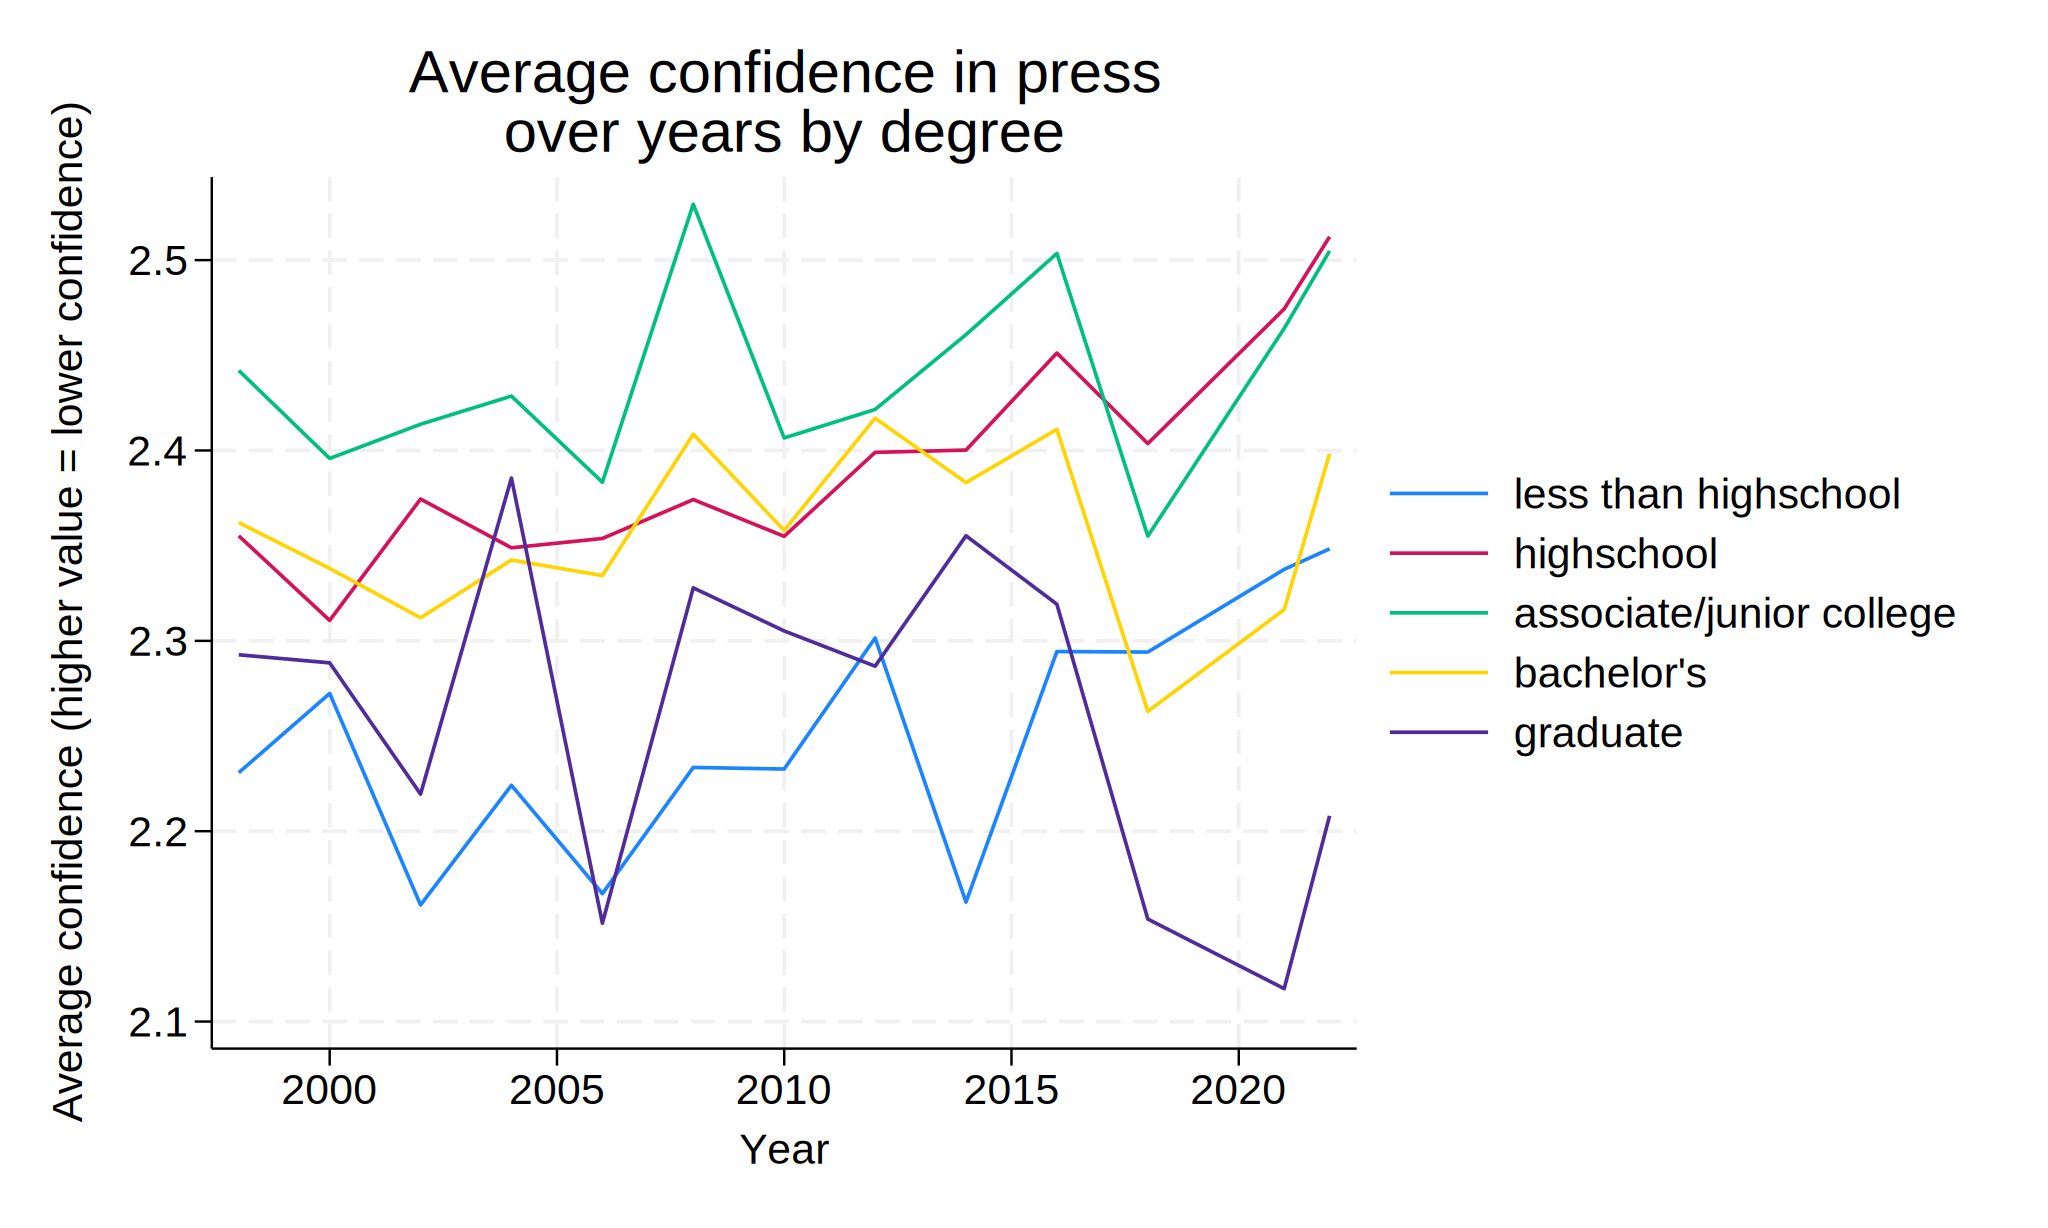

In [14]:
%%stata -qui
egen avg_confidence_press_no_hs = mean(conpress) if degree == 0, by(year)
egen avg_confidence_press_hs = mean(conpress) if degree == 1, by(year)
egen avg_confidence_press_aj = mean(conpress) if degree == 2, by(year)
egen avg_confidence_press_ba = mean(conpress) if degree == 3, by(year)
egen avg_confidence_press_phd = mean(conpress) if degree == 4, by(year)

graph twoway (line avg_confidence_press_no_hs ///
              avg_confidence_press_hs  ///
              avg_confidence_press_aj ///
              avg_confidence_press_ba ///
              avg_confidence_press_phd year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in press" "over years by degree") ///
        legend(label(1 "less than highschool")) ///
        legend(label(2 "highschool")) ///
        legend(label(3 "associate/junior college")) ///
        legend(label(4 "bachelor's")) ///
        legend(label(5 "graduate")) ///
)

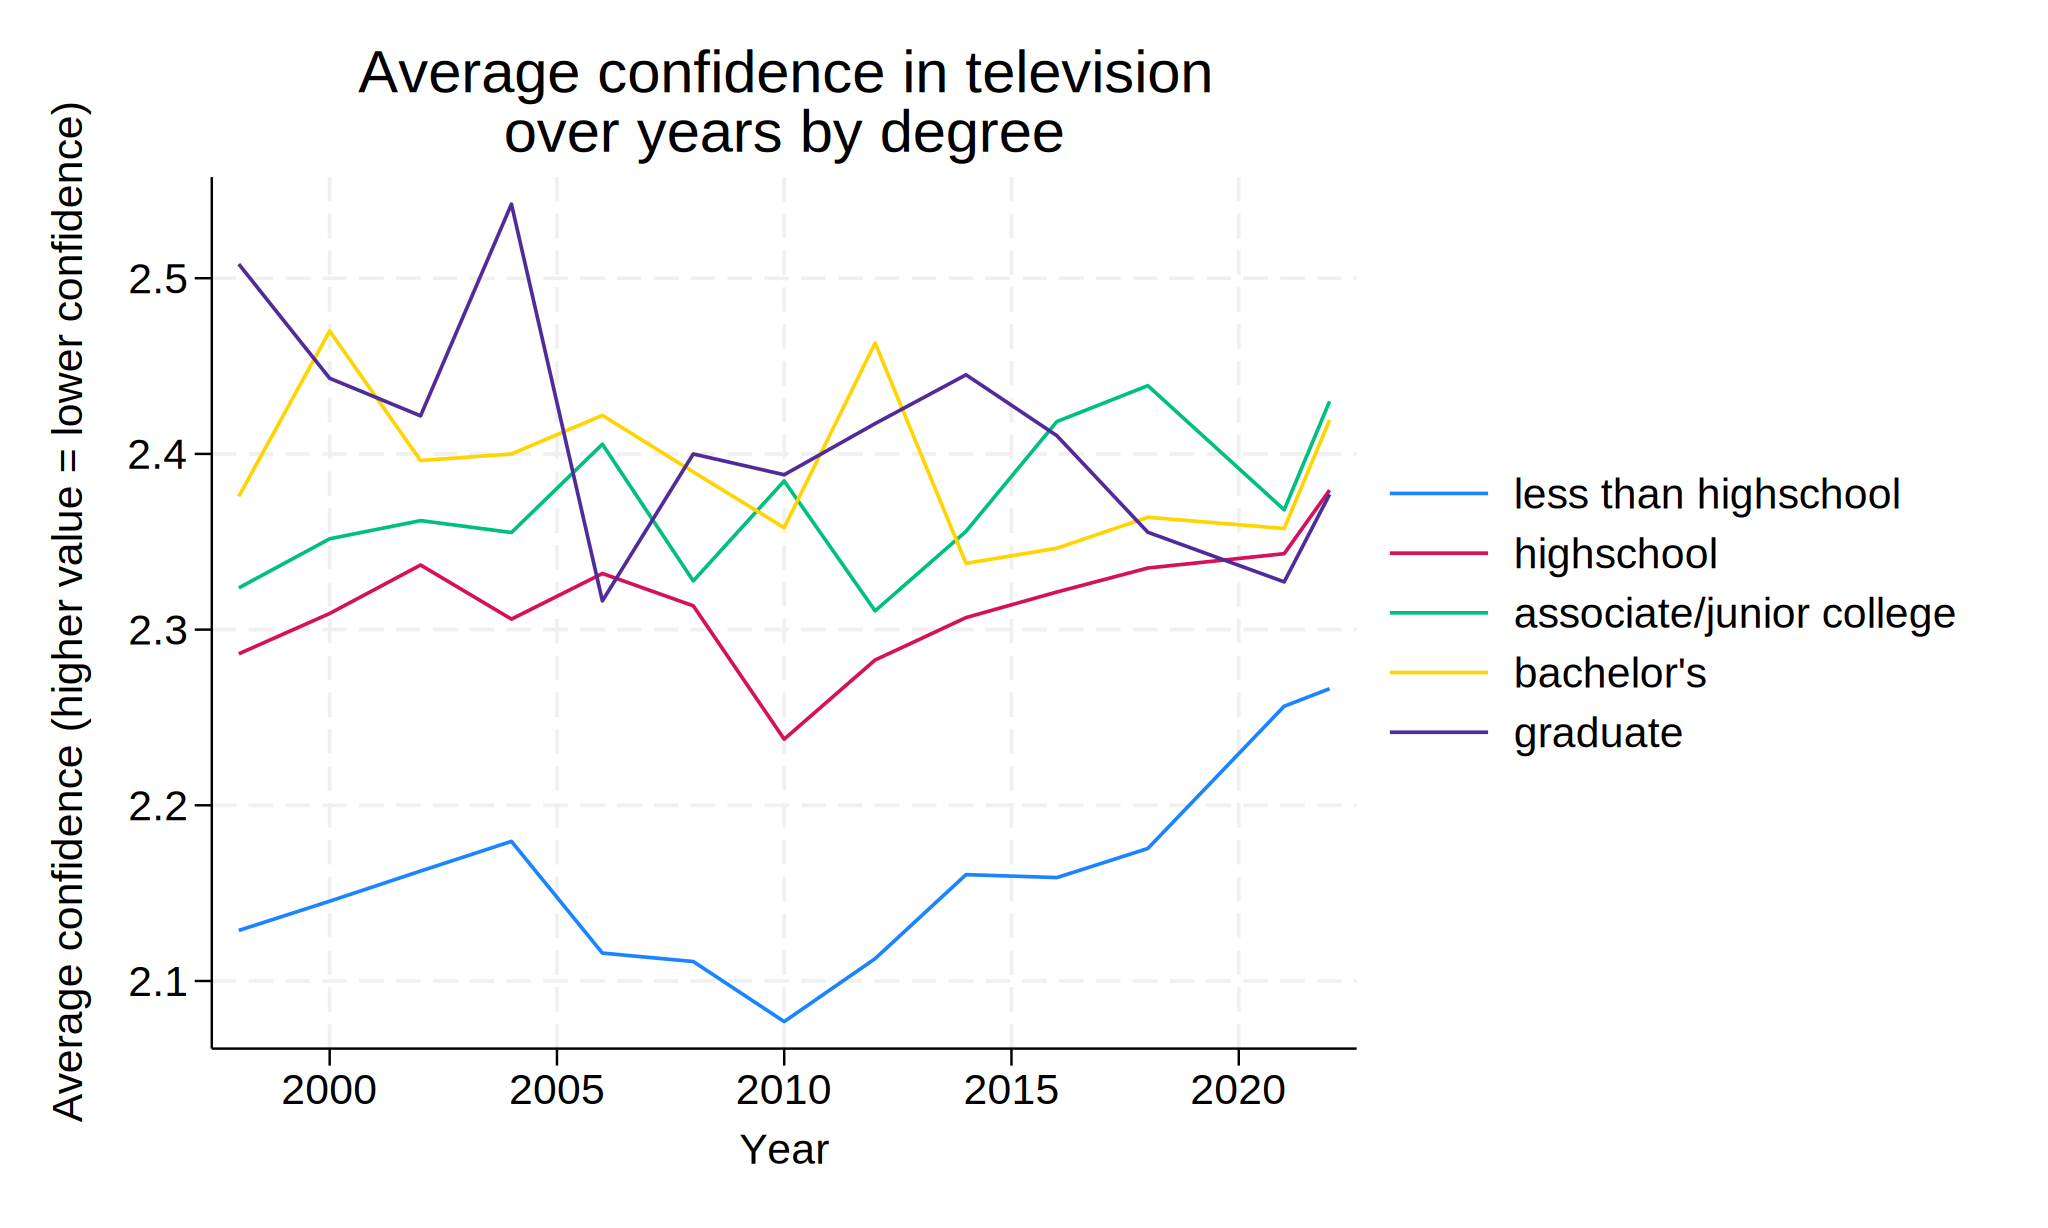

In [15]:
%%stata -qui
egen avg_confidence_tv_no_hs = mean(contv) if degree == 0, by(year)
egen avg_confidence_tv_hs = mean(contv) if degree == 1, by(year)
egen avg_confidence_tv_aj = mean(contv) if degree == 2, by(year)
egen avg_confidence_tv_ba = mean(contv) if degree == 3, by(year)
egen avg_confidence_tv_phd = mean(contv) if degree == 4, by(year)

graph twoway (line avg_confidence_tv_no_hs ///
              avg_confidence_tv_hs  ///
              avg_confidence_tv_aj ///
              avg_confidence_tv_ba ///
              avg_confidence_tv_phd year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in television" "over years by degree") ///
        legend(label(1 "less than highschool")) ///
        legend(label(2 "highschool")) ///
        legend(label(3 "associate/junior college")) ///
        legend(label(4 "bachelor's")) ///
        legend(label(5 "graduate")) ///
)

#### 4.3.1 Correlation

As we can see on the linecharts, there seem to be some slight correlations between the level of education and trust in media. Especially in the `contv` graph we can clearly differentiate between `less than highschool` and all other levels of education. Since we are dealing with two ordinal variables, we can try to analyze our finding further by calculating Spearman's correlation coefficient. Additionally, we can also calculate the $\chi^2$ as both `degree` and the confidence variables are categorical.

**Null hypothesis (H0):** <br>
There is no correlation between level of education and trust in media.

**Alternative hypothesis (H1):** <br>
There is a correlation between level of education and trust in media.

##### 4.3.1.1 Spearman's $\rho$

In [16]:
%%stata
spearman conpress degree 


Number of observations =  21,555
        Spearman's rho = -0.0136

Test of H0: conpress and degree are independent
                  Prob =  0.0458


In [17]:
%%stata
spearman contv degree


Number of observations = 21,597
        Spearman's rho = 0.0944

Test of H0: contv and degree are independent
                  Prob = 0.0000


##### 4.3.1.2 $\chi^2$

In [18]:
%%stata
tabulate conpress degree, chi2


 respondents |
  confidence |         respondents highest degree
    in press | less than  high scho  associate  bachelor' |     Total
-------------+--------------------------------------------+----------
a great deal |       367        930        132        400 |     2,122 
   only some |     1,283      4,496        709      1,846 |     9,593 
  hardly any |     1,041      5,165        907      1,865 |     9,840 
-------------+--------------------------------------------+----------
       Total |     2,691     10,591      1,748      4,111 |    21,555 


             | respondent
 respondents | s highest
  confidence |   degree
    in press |  graduate |     Total
-------------+-----------+----------
a great deal |       293 |     2,122 
   only some |     1,259 |     9,593 
  hardly any |       862 |     9,840 
-------------+-----------+----------
       Total |     2,414 |    21,555 

          Pearson chi2(8) = 246.2951   Pr = 0.000


In [19]:
%%stata
tabulate contv degree, chi2


 respondents |
  confidence |
          in |         respondents highest degree
  television | less than  high scho  associate  bachelor' |     Total
-------------+--------------------------------------------+----------
a great deal |       462      1,049        130        277 |     2,069 
   only some |     1,382      5,153        833      1,947 |    10,470 
  hardly any |       881      4,430        792      1,866 |     9,058 
-------------+--------------------------------------------+----------
       Total |     2,725     10,632      1,755      4,090 |    21,597 


 respondents | respondent
  confidence | s highest
          in |   degree
  television |  graduate |     Total
-------------+-----------+----------
a great deal |       151 |     2,069 
   only some |     1,155 |    10,470 
  hardly any |     1,089 |     9,058 
-------------+-----------+----------
       Total |     2,395 |    21,597 

          Pearson chi2(8) = 313.3490   Pr = 0.000


#### 4.3.2 Conclusion

For this categorization we get differing results. For one, Spearman's $\rho$ for correlation to `conpress` with `degree` is very close to zero, suggesting a very weak relationship between these two variables. This is in contrast to our $\chi^2$ for `conpress` which, with p-value of 0, suggests a highly significant association between confidence in the press and the respondents highest degree. Additionally, the p-value of Spearman's $\rho$ in the above mentioned case is close to our 0.05 significance level, suggesting that the null hypothesis *could* hold true. Nonetheless, the value is under the above mentioned significance level, meaning we can reject the null hypothesis.

The results for the `contv` case, on the other hand, seem clear cut. Both Spearman's $\rho$ as well as the corresponding p-value suggest a statistically significant correlation. The $\chi^2$ confirms this with p-value of 0. We can thus also reject the null hypothesis.

Overall, this gathers some interesting results. As we can take from the correlation between `conpress` and `degree`, a higher level of education correlates with a higher level of trust in the press, while for `contv` the exact opposite is the case. The higher the level of education, the lower the confidence in television. This is also confirmed by a positive $\rho$ value for this correlation and the negative $\rho$ value for the correlation with `conpress`.

### 4.4 Trust in press and TV by year by party affiliation

With the rise of the alt-right and the growing polarization of politics, one possible explaination for the falling confidence in press and television could be party affilition. Republicans are more likely to seek out "alternative media" compared to "mainstream media" <cite id="ei2pb"><a href="#zotero%7C17031804%2FVXKPZYX6">(Ihlebæk et al., 2022)</a></cite>. This could also present in a distrust in this survey.

To evaluate this, we first need to create a couple of dummy variable that indicate wheter the respondent self-identifies more with the republican or closer with the democrat party.

We are going to exclude independent and other party respondents as we can't really put them into either side of the political spectrum.

In [20]:
%%stata -qui
recode partyid (0=0) (1=1) (2=2) (4=3) (5=4) (6=5), gen(partyid2)
gen is_republican = (partyid2 > 2)
gen is_democrat = (partyid2 < 3)

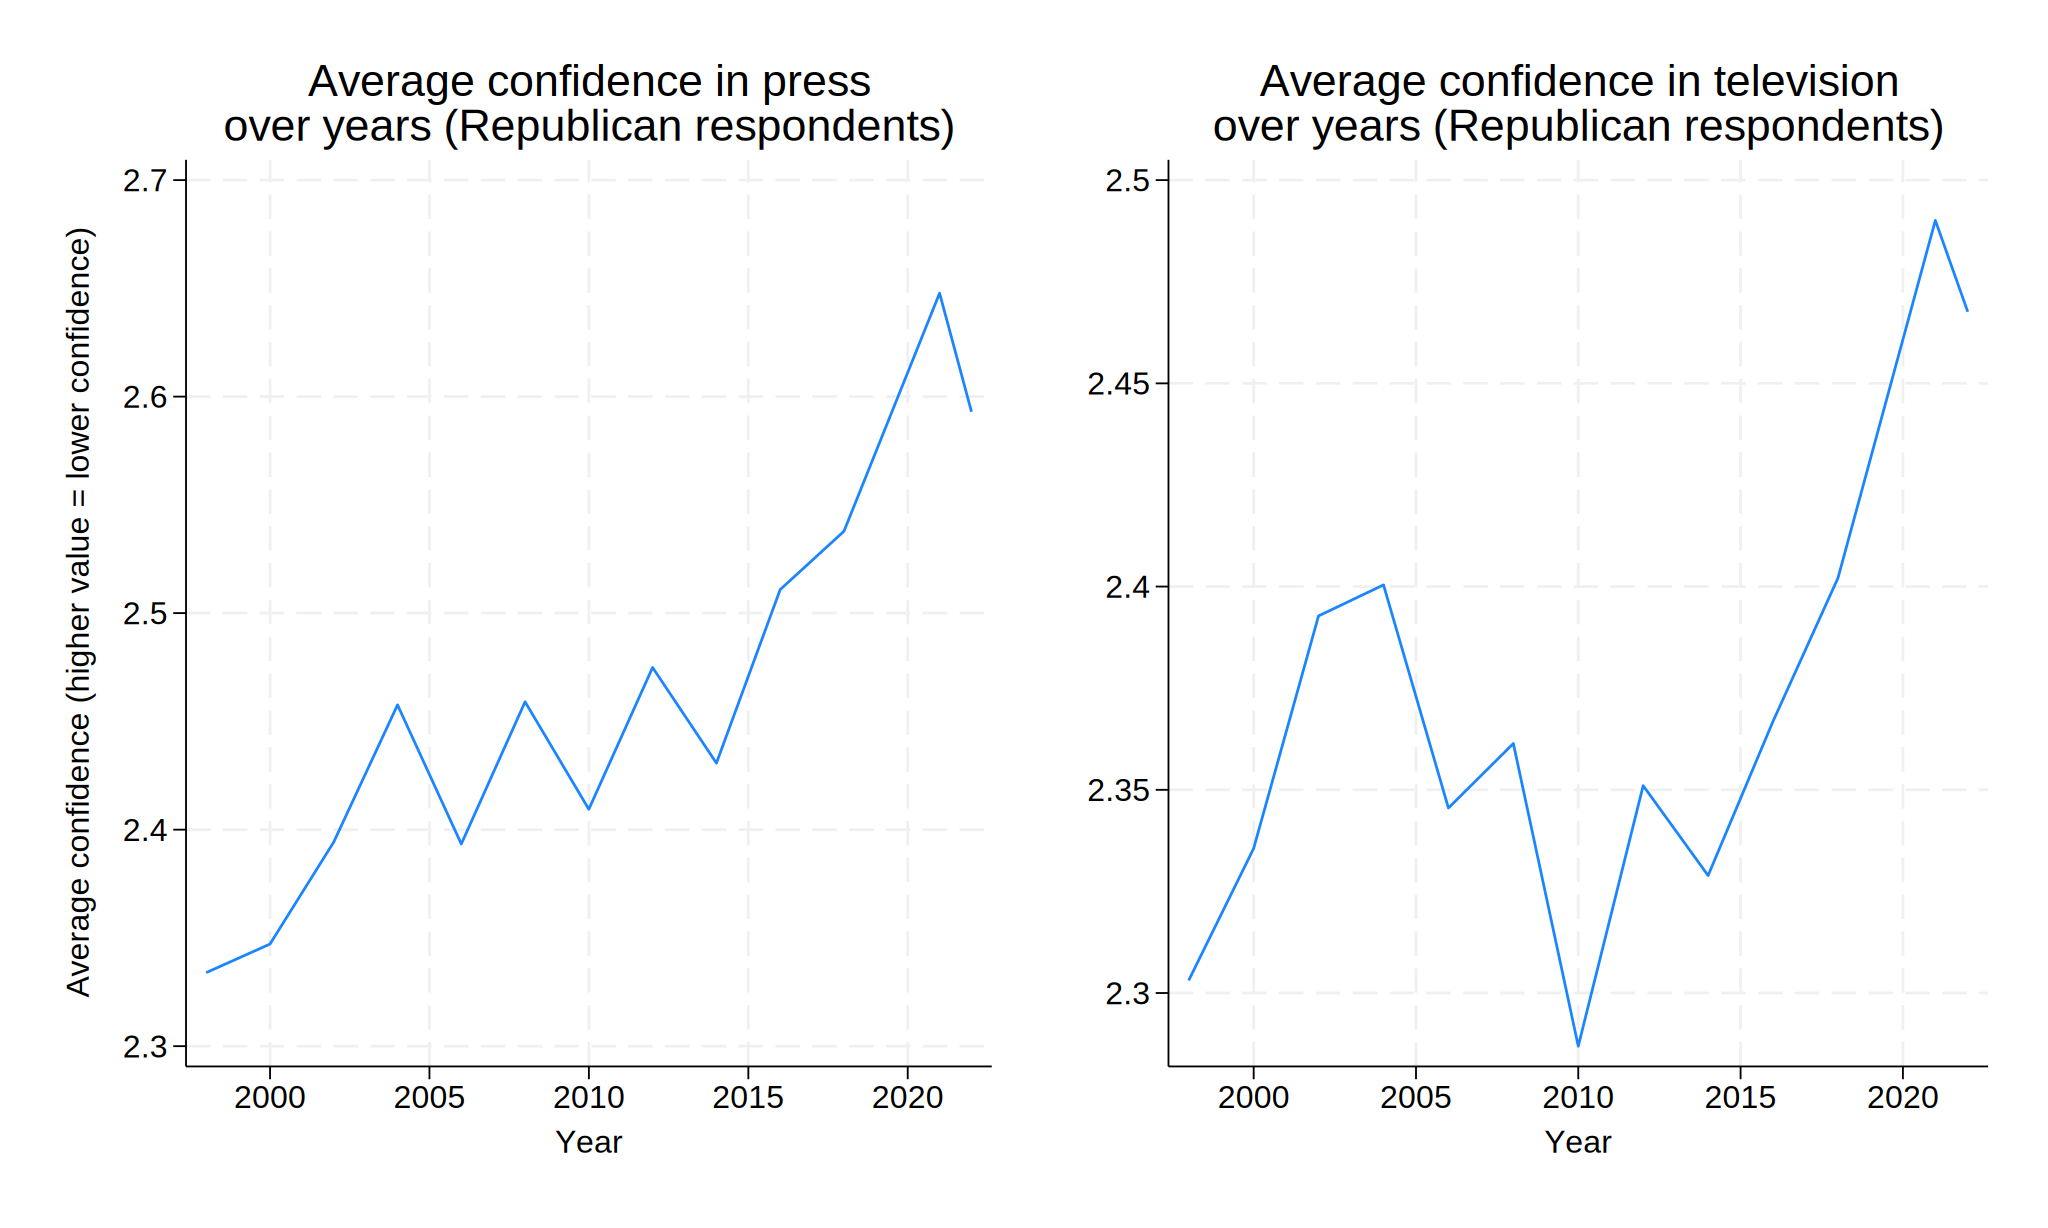

In [21]:
%%stata -qui
egen avg_confidence_press_rep = mean(conpress) if is_republican == 1, by(year)
graph twoway (line avg_confidence_press_rep year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in press" "over years (Republican respondents)") ///
), saving("graphs/press_rep", replace)

egen avg_confidence_tv_rep = mean(contv) if is_republican == 1, by(year)
graph twoway (line avg_confidence_tv_rep year, ///
        ytitle("") ///
        xtitle("Year") ///
        title("Average confidence in television" "over years (Republican respondents)") ///
), saving("graphs/tv_rep", replace)

graph combine "graphs/press_rep.gph" "graphs/tv_rep.gph"

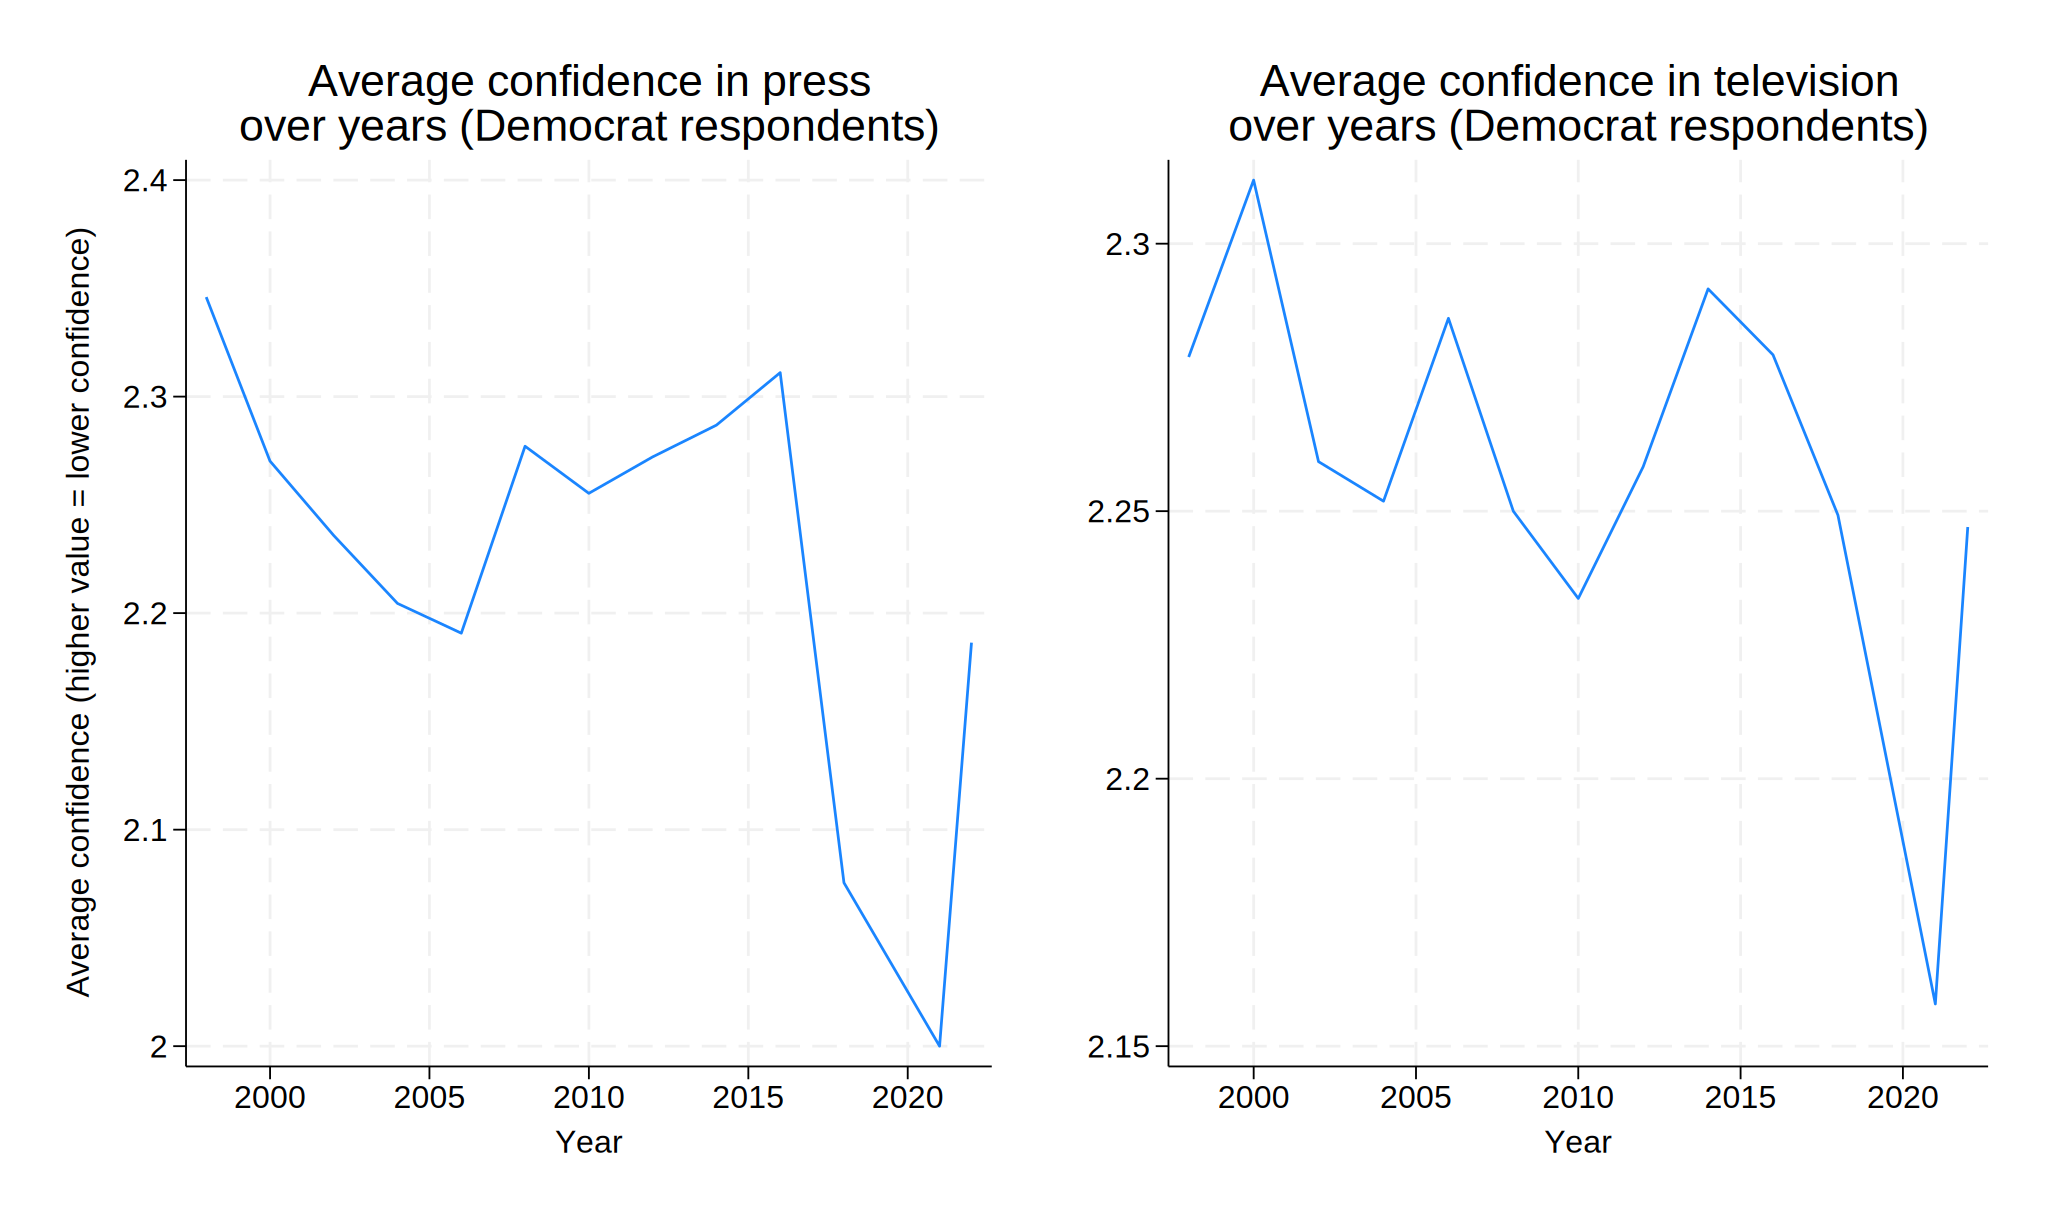

In [22]:
%%stata -qui
egen avg_confidence_press_dem = mean(conpress) if is_democrat == 1, by(year)
graph twoway (line avg_confidence_press_dem year, ///
        ytitle("Average confidence (higher value = lower confidence)") ///
        xtitle("Year") ///
        title("Average confidence in press" "over years (Democrat respondents)"), ///
), saving("graphs/press_dem", replace)

egen avg_confidence_tv_dem = mean(contv) if is_democrat == 1, by(year)
graph twoway (line avg_confidence_tv_dem year, ///
        ytitle("") ///
        xtitle("Year") ///
        title("Average confidence in television" "over years (Democrat respondents)") ///
), saving("graphs/tv_dem", replace)

graph combine "graphs/press_dem.gph" "graphs/tv_dem.gph"

#### 4.4.1 Correlation

As we can see, there is a clear difference in media trust between republicans and democrats. Since both confidence variables and our recoded party affiliation variable are ordinal, we can use the Spearman correlation test to verify this mathematically. Again, both  `partyid2` and the confidence variables are categorical, meaning that we can also calculate the $\chi^2$.

**Null hypothesis (H0):** <br>
There is no correlation between party affiliation and trust in media.

**Alternative hypothesis (H1):** <br>
There is a correlation between party affiliation and trust in media.

##### 4.4.1.1 Spearman's $\rho$

In [23]:
%%stata
spearman conpress partyid2


Number of observations = 21,431
        Spearman's rho = 0.2247

Test of H0: conpress and partyid2 are independent
                  Prob = 0.0000


In [24]:
%%stata
spearman contv partyid2


Number of observations = 21,471
        Spearman's rho = 0.1232

Test of H0: contv and partyid2 are independent
                  Prob = 0.0000


##### 4.4.1.2 $\chi^2$

In [25]:
%%stata
tabulate conpress partyid2, chi2


 respondents |  RECODE of partyid (respondents political
  confidence |             party affiliation)
    in press |         0          1          2          3 |     Total
-------------+--------------------------------------------+----------
a great deal |       581        376        309        519 |     2,117 
   only some |     1,863      1,875      1,375      2,487 |     9,539 
  hardly any |     1,050      1,315      1,004      3,029 |     9,775 
-------------+--------------------------------------------+----------
       Total |     3,494      3,566      2,688      6,035 |    21,431 


 respondents |  RECODE of partyid (respondents
  confidence |   political party affiliation)
    in press |         4          5          7 |     Total
-------------+---------------------------------+----------
a great deal |       189        109         34 |     2,117 
   only some |     1,093        662        184 |     9,539 
  hardly any |     1,565      1,524        288 |     9,775 
---------

In [26]:
%%stata
tabulate contv partyid2, chi2


 respondents |
  confidence |  RECODE of partyid (respondents political
          in |             party affiliation)
  television |         0          1          2          3 |     Total
-------------+--------------------------------------------+----------
a great deal |       424        344        263        632 |     2,065 
   only some |     1,905      1,926      1,372      2,765 |    10,404 
  hardly any |     1,165      1,303      1,050      2,672 |     9,002 
-------------+--------------------------------------------+----------
       Total |     3,494      3,573      2,685      6,069 |    21,471 


 respondents |
  confidence |  RECODE of partyid (respondents
          in |   political party affiliation)
  television |         4          5          7 |     Total
-------------+---------------------------------+----------
a great deal |       226        144         32 |     2,065 
   only some |     1,321        927        188 |    10,404 
  hardly any |     1,301      1,228    

#### 4.4.2 Conclusion

As we can see from our correlation tests, there is a a positive correlation between confidence in the media and party affiliation (higher value for `contv` and `conpress` meaning lower confidence; higher value for `partyid2` meaning more right-wing). Both the Spearman tests and $\chi^2$ tests show p-values of 0, indicating a strong evidence against the null hypothesis.

Therefore we can reject the null hypothesis and conclude that there is a correlation between party affiliation and trust in the media (the more right-wing, the less trust in the media).

## 5. Conclusion

This paper, of course, only covers individual components of the increase in media distrust rather than why there even is an increase in the first place. This being said, there are groups that measurably contribute to the trend. First and foremost the right can certainly be named as one of those groups, showing a significant correlation between political party affiliation and distrust in media. Why right leaning people tend to distrust the media nowadays needs to be further researched.

The correlation between gender and trust in the media, while detectable, does not appear as significant. While a slight correlation does exist, it seems to be resulting more from the political divide between genders than the other way round <cite id="0wrkb"><a href="#zotero%7C17031804%2FTP5UJ49C">(Burn-Murdoch, 2024)</a></cite>.

The analysis of the correlation between education level and trust in media also shows a positive correlation for `contv` (meaning people with higher levels of education tend to distrust television programs more) and a slight negative correlation for `conpress` (meaning people with higher levels of education tend to trust the press more).

## 6. Sources

<!-- BIBLIOGRAPHY START -->
<div>
  <div class="csl-entry"><i id="zotero|17031804/DWQWRWV8"></i>&emsp;Beauchamp, Z. (2021, January 30). <i>Marjorie Taylor Greene’s space laser and the age-old problem of blaming the Jews</i>. Vox. <a href="https://www.vox.com/22256258/marjorie-taylor-greene-jewish-space-laser-anti-semitism-conspiracy-theories">https://www.vox.com/22256258/marjorie-taylor-greene-jewish-space-laser-anti-semitism-conspiracy-theories</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/TP5UJ49C"></i>&emsp;Burn-Murdoch, J. (2024). <i>A new global gender divide is emerging</i>. <a href="https://www.ft.com/content/29fd9b5c-2f35-41bf-9d4c-994db4e12998">https://www.ft.com/content/29fd9b5c-2f35-41bf-9d4c-994db4e12998</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/MAEMS8PD"></i>&emsp;Casero-Ripollés, A. (2012). Beyond Newspapers: News Consumption among Young People in the Digital Era. <i>Comunicar</i>, <i>20</i>(39), 151–158. <a href="https://doi.org/10.3916/C39-2012-03-05">https://doi.org/10.3916/C39-2012-03-05</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/C22RZNRD"></i>&emsp;Daly, K. (2021, January 7). <i>The Capitol siege’s QAnon roots</i>. Axios. <a href="https://www.axios.com/2021/01/07/capitol-sieges-qanon-roots">https://www.axios.com/2021/01/07/capitol-sieges-qanon-roots</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/ZQPTQBNI"></i><i>&emsp;GSS General Social Survey | NORC</i>. (n.d.). Retrieved March 6, 2024, from <a href="https://gss.norc.org/">https://gss.norc.org/</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/W98IDGWM"></i>&emsp;Happer, C., &#38; Philo, G. (2013). The Role of the Media in the Construction of Public Belief and Social Change. <i>Journal of Social and Political Psychology</i>, <i>2013</i>(1), 321–336. <a href="https://doi.org/10.5964/jspp.v1i1.96">https://doi.org/10.5964/jspp.v1i1.96</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/4M6R538D"></i>&emsp;Larson, N., Parsons, J., &#38; Servage, L. (2007). <i>The Google-ization of Knowledge</i>. ERIC Clearinghouse.</div><br>
  <div class="csl-entry"><i id="zotero|17031804/DI5ETP3M"></i>&emsp;Stimers, M. (2020). The Dunning-Kruger Effect Based on Educational Attainment and Political Affiliation Concerning Trust and Perceived Accuracy of the Media. <i>Research &#38; Reviews: Journal of Social Sciences</i>, <i>6</i>(3), 57–64. <a href="https://www.rroij.com/peer-reviewed/the-dunningkruger-effect-based-on-educational-attainment-and-political-affiliation-concerning-trust-and-perceived-accuracy-of-the-88726.html">https://www.rroij.com/peer-reviewed/the-dunningkruger-effect-based-on-educational-attainment-and-political-affiliation-concerning-trust-and-perceived-accuracy-of-the-88726.html</a></div><br>
  <div class="csl-entry"><i id="zotero|17031804/F68AXVWU"></i>&emsp;Strömbäck, J., Tsfati, Y., Boomgaarden, H., Damstra, A., Lindgren, E., Vliegenthart, R., &#38; Lindholm, T. (2020). News media trust and its impact on media use: toward a framework for future research. <i>Annals of the International Communication Association</i>, <i>44</i>(2), 139–156. <a href="https://doi.org/10.1080/23808985.2020.1755338">https://doi.org/10.1080/23808985.2020.1755338</a></div>
</div>
<!-- BIBLIOGRAPHY END -->